# Projekt 4

## Treść

Dla strat/zwrotów (lub stóp strat/zwrotów) z wybranej zmiennej ryzyka:

1. Oblicz VaR95% i VaR99%

    a. metodą parametryczną z wybranym rozkładem
    
    b. metodą historyczną
        i. zwykłą
        ii. ważoną
        iii. przy użyciu filtrowania szeregiem GARCH
    c. metodą Monte Carlo z wybranym rozkładem/procesem
   
   
2. Przeprowadź testowanie wsteczne wybraną metodą dla 1a), 1b), 1c). Porównaj wyniki.

## Zadanie

W zadaniu wykorzystamy dane o cenach Aluminium z poprzednich projektów.

In [54]:
import pandas as pd
import numpy as np
from scipy.stats import uniform
import matplotlib.pyplot as plt
from scipy.stats.mstats import gmean
from scipy import stats
from scipy.stats.mstats import winsorize
from collections import Counter
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import norm
from statistics import stdev
import seaborn as sns
from sklearn import preprocessing
from scipy.stats import genextreme
from scipy.stats import gumbel_r
import statistics
from matplotlib.pyplot import figure
from scipy.stats import weibull_min
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import genextreme as gev
from scipy.stats import t, kstest
from scipy.stats import chi2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import scipy.stats as ss

!pip install -q arch
import arch

You should consider upgrading via the 'c:\users\reyun\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [3]:
AI_price=pd.read_csv('Aluminium.csv',delimiter=',',usecols=[1],header=0,index_col=False)

AI_price = AI_price['Close'][::-1][1:]



In [4]:
AI_rate_l = []

for i in range(len(AI_price)-1):
    AI_rate = np.log(AI_price[i+1]/AI_price[i])
    AI_rate_l.append(AI_rate*100)


In [5]:
# Należy znaleźć rozkład danych

(array([101., 454., 335., 125.,  99.,  47.,  42.,  26.,  22.,   6.]),
 array([1461.85 , 1700.565, 1939.28 , 2177.995, 2416.71 , 2655.425,
        2894.14 , 3132.855, 3371.57 , 3610.285, 3849.   ]),
 <BarContainer object of 10 artists>)

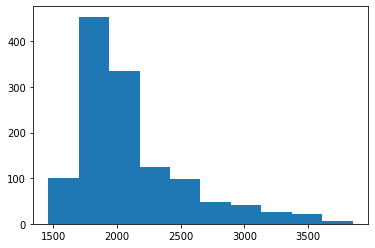

In [6]:
plt.hist(AI_price)

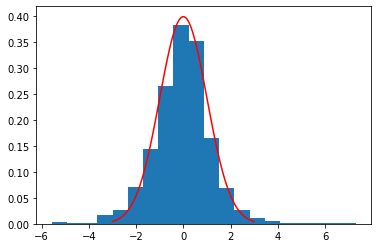

In [7]:
x = np.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 100)
x = np.linspace(-3,3,100)
plt.hist(AI_rate_l, bins=20, density=True)
plt.plot(x, norm.pdf(x), 'r-')

In [8]:
kstest(AI_rate_l, "norm")#p-value 0.049 więc na poziomie alpha=5% odrzucamy hipotezę jakoby próbka pochodziła z rozkładu normalnego

KstestResult(statistic=0.03825162321594922, pvalue=0.049368230448909034)

In [9]:
kstest(AI_rate_l, "t", args=(1255,))#p-value 0.051, więc na poziomie ufności 5% nie mamy podstaw do odrzucenia h0

KstestResult(statistic=0.03812956329585654, pvalue=0.050542679901580345)

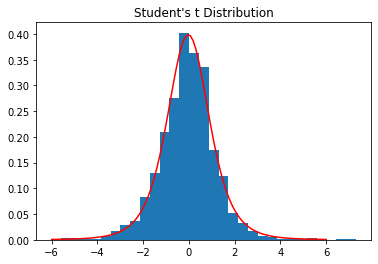

(4.634339796101312, -0.027580892818088107, 0.9479987031112597)


In [10]:
param = t.fit(AI_rate_l)

x = np.linspace(-6,6,100)
pdf_fitted = t.pdf(x, loc=param[1], scale=param[2], df=param[0])

plt.title('Student\'s t Distribution')
plt.plot(x, pdf_fitted,'r-')
plt.hist(AI_rate_l, bins=30, density=True)
plt.show()
print(param)

Przyjmuje za rozkład stóp zwrotu rozkład t-studenta z 1255 stopniami swobody o parametrze położenia -0.028 i skali 0.948

In [11]:
sigma = param[2]
mu = param[1]
df = param[0]

### 1. a) metoda parametryczna z wybranym rozkładem

$VaR_\alpha = \sigma t^{−1}_
ν
(\alpha) + \mu$

ppf = percent point function (odwrotność cdf)

Parametryczna VaR(95) to:  1.9164862029894636


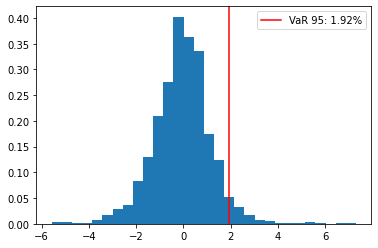

In [12]:
# parametryczna VaR(95)
var_95_1a = t.ppf(0.95, df, loc = mu, scale = sigma)
print("Parametryczna VaR(95) to: ", var_95_1a)


plt.hist(AI_rate_l, bins=30, density=True)
plt.axvline(x=var_95_1a, color='r', linestyle='-', label="VaR 95: {0:.2f}%".format(var_95_1a))
plt.legend()
# Var95_lower = t.ppf(0.025, df, loc = mu, scale = sigma)
# Var95_upper = t.ppf(0.975, df, loc = mu, scale = sigma)
# print("Parametryczny VaR(95): górne 2.5", round(Var95_lower, 4), ', dolne 2.5: ', round(Var95_upper, 4))
# plt.axvline(x=Var95_lower, color='r', linestyle='-', label="VaR 95: {0:.2f}%".format(Var95_lower))
# plt.axvline(x=Var95_upper, color='r', linestyle='-', label="VaR 95: {0:.2f}%".format(Var95_upper))

Parametryczna VaR(99) to:  3.2703567181540945


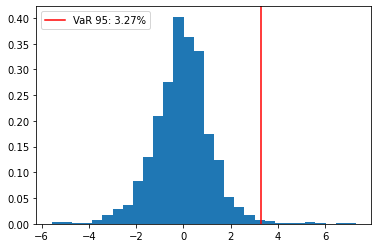

In [13]:
# parametryczna VaR(99)
var_99_1a = t.ppf(0.99, df, loc = mu, scale = sigma)
print("Parametryczna VaR(99) to: ", var_99_1a)


plt.hist(AI_rate_l, bins=30, density=True)
plt.axvline(x=var_99_1a, color='r', linestyle='-', label="VaR 95: {0:.2f}%".format(var_99_1a))
plt.legend()
# Var99_lower = t.ppf(0.005, df, loc = mu, scale = sigma)
# Var99_upper = t.ppf(0.995, df, loc = mu, scale = sigma)
# print("Parametryczny VaR(99) górne 0.5:", round(Var99_lower, 4), ', dolne 0.5: ', round(Var99_upper, 4))
# plt.axvline(x=Var95_lower, color='r', linestyle='-', label="VaR 95: {0:.2f}%".format(Var95_lower))
# plt.axvline(x=Var95_upper, color='r', linestyle='-', label="VaR 95: {0:.2f}%".format(Var95_upper))

### 1. b) metoda historyczna

* **zwykła**

Historyczny zwykły VaR(95):  1.816


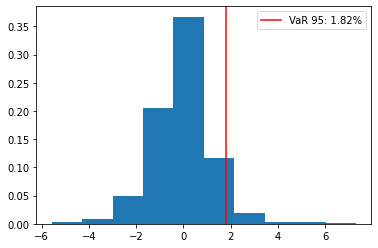

In [14]:
# Calculate historical VaR(95)
var_95_1b1 = np.percentile(AI_rate_l, 95)
print("Historyczny zwykły VaR(95): ", round(var_95_1b1, 4))

# Plot the probability of each sorted return quantile
plt.hist(AI_rate_l, density=True, stacked=True)

# Denote the VaR 95 quantile
plt.axvline(x=var_95_1b1, color='r', linestyle='-', label="VaR 95: {0:.2f}%".format(var_95_1b1))
plt.legend()
plt.show()

Historyczna zwykła VaR(99):  3.1107


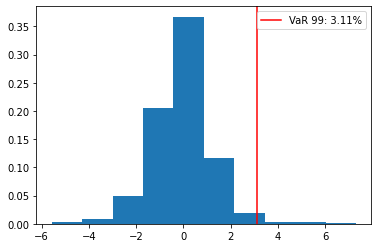

In [15]:
# Historyczny zwykły VaR(99)
var_99_1b1 = np.percentile(AI_rate_l, 99)
print("Historyczna zwykła VaR(99): ", round(var_99_1b1, 4))

plt.hist(AI_rate_l, density=True, stacked=True)

plt.axvline(x=var_99_1b1, color='r', linestyle='-', label="VaR 99: {0:.2f}%".format(var_99_1b1))
plt.legend()
plt.show()

* **ważona**

In [16]:
lambd = 0.97
weight_list = [lambd**i for i in range(len(AI_rate_l))]
w1 = 1/(1+sum(weight_list[1:]))
weight_list = [i*w1 for i in weight_list]

In [17]:
w1

0.030000000000000127

In [18]:
weight_list.reverse()
weighted_historical = np.column_stack((np.array(AI_rate_l), np.array(weight_list)))

In [19]:
weighted_historical

array([[ 1.59228327e+00,  7.51013526e-19],
       [-1.03316779e+00,  7.74240748e-19],
       [-9.49727260e-03,  7.98186339e-19],
       ...,
       [-9.37262784e-01,  2.82270000e-02],
       [ 6.51807809e-01,  2.91000000e-02],
       [ 2.08314078e+00,  3.00000000e-02]])

In [20]:
weighted_historical = weighted_historical[weighted_historical[:, 0].argsort()]
weighted_historical

array([[-5.57069648e+00,  2.11547937e-18],
       [-5.34323771e+00,  1.72264644e-05],
       [-4.98942566e+00,  1.38106167e-18],
       ...,
       [ 5.62315552e+00,  1.87281867e-18],
       [ 6.55231017e+00,  1.93074090e-18],
       [ 7.30803669e+00,  1.57221289e-05]])

In [21]:
weighted_historical[:,1] = np.cumsum(weighted_historical[:,1])
weighted_historical[:10]

array([[-5.57069648e+00,  2.11547937e-18],
       [-5.34323771e+00,  1.72264644e-05],
       [-4.98942566e+00,  1.72264644e-05],
       [-4.86859595e+00,  3.55349609e-05],
       [-4.64087104e+00,  5.68552952e-05],
       [-4.07086737e+00,  5.73900736e-05],
       [-3.60948487e+00,  5.85352713e-05],
       [-3.53726309e+00,  5.85352713e-05],
       [-3.50761224e+00,  7.04877220e-05],
       [-3.44600718e+00,  7.04877220e-05]])

In [22]:
# Znalezienie najbliższego sum(wi) approx alpha=0.95
abs_value95 = np.abs(weighted_historical[:,1] - 0.95)
smallest_difference_index95 = abs_value95.argmin()
closest_element95 = weighted_historical[smallest_difference_index95,:]
var_95_1b2 = closest_element95[0]
var_95_1b2

1.4606415132364903

In [23]:
# Znalezienie najbliższego sum(wi) approx alpha=0.99
abs_value99 = np.abs(weighted_historical[:,1] - 0.99)
smallest_difference_index99 = abs_value99.argmin()
closest_element99 = weighted_historical[smallest_difference_index99,:]
var_99_1b2 = closest_element99[0]
var_99_1b2

2.083140777286276

* **przy użyciu filtrowania szeregiem GARCH**

In [24]:
!pip install arch

You should consider upgrading via the 'c:\users\reyun\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [25]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [26]:
from arch import arch_model

In [27]:
# basic_gm = arch_model(AI_rate_l, p=1, q=1, mean='constant', vol='GARCH', dist='t')
basic_gm = arch_model(AI_rate_l, p=1, q=1, mean='constant')#, vol='GARCH', dist='skewt')

In [28]:
gm_result = basic_gm.fit(update_freq=1)

Iteration:      1,   Func. Count:      6,   Neg. LLF: 6838.91404740257
Iteration:      2,   Func. Count:     15,   Neg. LLF: 337183369775.83826
Iteration:      3,   Func. Count:     23,   Neg. LLF: 2197.0281361587604
Iteration:      4,   Func. Count:     31,   Neg. LLF: 2244.3585426111667
Iteration:      5,   Func. Count:     39,   Neg. LLF: 1936.9464511722758
Iteration:      6,   Func. Count:     44,   Neg. LLF: 1936.9168983787542
Iteration:      7,   Func. Count:     49,   Neg. LLF: 1936.916758657745
Iteration:      8,   Func. Count:     54,   Neg. LLF: 1936.916748424057
Iteration:      9,   Func. Count:     58,   Neg. LLF: 1936.9167484247214
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1936.916748424057
            Iterations: 9
            Function evaluations: 58
            Gradient evaluations: 9


In [29]:
# gm_result.params

In [30]:
gm_result.summary()
# gm_result.plot()
# gm_forecast = gm_result.forecast(horizon=5)
# print(gm_forecast.variance[-1:])

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1936.92
Distribution:                  Normal   AIC:                           3881.83
Method:            Maximum Likelihood   BIC:                           3902.38
                                        No. Observations:                 1256
Date:                Tue, Jun 07 2022   Df Residuals:                     1255
Time:                        19:51:53   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu            -0.0224  2.944e-02     -0.761      0.446 [-8.011e-02,3.528e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0540  2.340e-02      2.309  2.094e-02 [8.169e-03,9.989e-02]
alpha[1]       0.0991  2.592e-02      3.824  1.313e-04   [4.832e-02,  0.150]
beta[1]        0.8622  3.638e-02     23.699 3.665e-124     [  0.791,  0.933]
============================================================================

Covariance estimator: robust
"""

In [31]:
gm_result.params

mu         -0.022415
omega       0.054028
alpha[1]    0.099132
beta[1]     0.862152
Name: params, dtype: float64

In [32]:
c0 = gm_result.params[0]
alpha0 = gm_result.params[1]
alpha1 = gm_result.params[2]
beta1 = gm_result.params[3]
sigma_list = [alpha0 + alpha1*AI_rate_l[0]**2]
for i in range(1,len(AI_rate_l)):
    sigma_i = alpha0 + alpha1*AI_rate_l[i-1]**2 + beta1*sigma_list[i-1]
    sigma_list.append(sigma_i)

In [33]:
Ei = (AI_rate_l - gm_result.params[0])/np.sqrt(sigma_list)

In [34]:
Ei[:10]

array([ 2.92201262, -1.34038097,  0.01602099,  1.16901088, -2.2301548 ,
        0.33823936,  0.17316772,  4.3132974 ,  0.17196497,  1.6575821 ])

In [35]:
q_95 = np.quantile(Ei, 0.95)
sigma_t1 = alpha0 + alpha1*AI_rate_l[-1]**2+beta1*sigma_list[-1]
var_95_1b3 = q_95*sigma_t1+c0
q_99 = np.quantile(Ei, 0.99)
var_99_1b3 = q_99*sigma_t1+c0
print("Z metody filtracji GARCH wynika VaR(95): ", round(var_95_1b3, 4))
print("Z metody filtracji GARCH wynika VaR(99): ", round(var_99_1b3, 4))

Z metody filtracji GARCH wynika VaR(95):  1.8246
Z metody filtracji GARCH wynika VaR(99):  2.8711


### 1. c) metodą Monte Carlo z wybranym rozkładem/procesem

In [36]:
N=1000
T = 1200 # liczba symulowanych dni
AI_series = []

for i in range(N):
    t_returns = t.rvs(df, mu, sigma, T)
    AI_series.append(t_returns)
# można wyplotować
# wykres linie kwantylowe - też można zrobić
#     plt.plot(t_returns)
# plt.axhline(np.percentile(t_returns,95), color='r', linestyle='dashed')
# plt.axhline(np.mean(t_returns), color='b')

In [37]:
# VaR(95)
var_95_1c = np.percentile(AI_series, 95)
print("Monte Carlo VaR(95): ", round(var_95_1c, 4))

Monte Carlo VaR(95):  1.9188


In [38]:
# VaR(99)
var_99_1c = np.percentile(AI_series, 99)
print("Monte Carlo VaR(99): ", round(var_99_1c, 4))

Monte Carlo VaR(99):  3.2666


### 2. Testowanie wsteczne

In [76]:
def backtest(K_a,cl):#funkcja licząca
    data=AI_rate_l # dane
    n=len(data)
    I=[] #wektor przekroczeń
    for i in range(n-1):
        K=K_a #wartość kwantyla obliczona w pierwszym zadaniu
        if data[i+1]<=K:
            I.append(1)
        elif data[i+1]>K:
            I.append(0)
    return cl/100,round(np.mean(I),4),round((cl/100) *(1-(cl/100)),4),round(np.var(I),4),I   
        
       
    

In [77]:
def test_Kupca(p,I):#test pokrycia kupca
    n=len(I)
    I1=sum(I)
    I0=n-sum(I)
    
    LR=-2*np.log((((1-p)**I0)*(p**I1))/(((1-(I1/n))**I0)*((I1/n)**I1)))
    pval= 1 - chi2.cdf(LR,1)
    return pval


#### Dla 1a):

In [78]:
bt95=backtest(var_95_1a,95)
print('alpha=',bt95[0],'\n','E(I)=',bt95[1],'\n','alpha*(1-alpha)=',bt95[2],'\n','Var(I)=',bt95[3])

kupiec=test_Kupca(bt95[0],bt95[4])
print("P-value w teście Kupca wynosi",kupiec)

alpha= 0.95 
 E(I)= 0.957 
 alpha*(1-alpha)= 0.0475 
 Var(I)= 0.0412
P-value w teście Kupca wynosi 0.24611710229744033


In [79]:
bt99=backtest(var_99_1a,99)
print('alpha=',bt99[0],'\n','E(I)=',bt99[1],'\n','alpha*(1-alpha)=',bt99[2],'\n','Var(I)=',bt99[3])
kupiec=test_Kupca(bt99[0],bt99[4])
print("P-value w teście Kupca wynosi",kupiec)

alpha= 0.99 
 E(I)= 0.9904 
 alpha*(1-alpha)= 0.0099 
 Var(I)= 0.0095
P-value w teście Kupca wynosi 0.8750992214258637


#### Dla 1b):

##### zwykła

In [80]:
bt95=backtest(var_95_1b1,95)
print('alpha=',bt95[0],'\n','E(I)=',bt95[1],'\n','alpha*(1-alpha)=',bt95[2],'\n','Var(I)=',bt95[3])
kupiec=test_Kupca(bt95[0],bt95[4])
print("P-value w teście Kupca wynosi",kupiec)

alpha= 0.95 
 E(I)= 0.9498 
 alpha*(1-alpha)= 0.0475 
 Var(I)= 0.0477
P-value w teście Kupca wynosi 0.9741855551808535


In [81]:
bt99=backtest(var_99_1b1,99)
print('alpha=',bt99[0],'\n','E(I)=',bt99[1],'\n','alpha*(1-alpha)=',bt99[2],'\n','Var(I)=',bt99[3])
kupiec=test_Kupca(bt99[0],bt99[4])
print("P-value w teście Kupca wynosi",kupiec)

alpha= 0.99 
 E(I)= 0.9896 
 alpha*(1-alpha)= 0.0099 
 Var(I)= 0.0103
P-value w teście Kupca wynosi 0.8990027606944707


##### ważona

In [82]:
bt95=backtest(var_95_1b2,95)
print('alpha=',bt95[0],'\n','E(I)=',bt95[1],'\n','alpha*(1-alpha)=',bt95[2],'\n','Var(I)=',bt95[3])
kupiec=test_Kupca(bt95[0],bt95[4])
print("P-value w teście Kupca wynosi",kupiec)

alpha= 0.95 
 E(I)= 0.9179 
 alpha*(1-alpha)= 0.0475 
 Var(I)= 0.0753
P-value w teście Kupca wynosi 1.6524522576943923e-06


In [83]:
bt99=backtest(var_99_1b2,99)
print('alpha=',bt99[0],'\n','E(I)=',bt99[1],'\n','alpha*(1-alpha)=',bt99[2],'\n','Var(I)=',bt99[3])
kupiec=test_Kupca(bt99[0],bt99[4])
print("P-value w teście Kupca wynosi",kupiec)

alpha= 0.99 
 E(I)= 0.9649 
 alpha*(1-alpha)= 0.0099 
 Var(I)= 0.0338
P-value w teście Kupca wynosi 3.664735181985179e-12


##### GARCH

In [84]:
bt95=backtest(var_95_1b3,95)
print('alpha=',bt95[0],'\n','E(I)=',bt95[1],'\n','alpha*(1-alpha)=',bt95[2],'\n','Var(I)=',bt95[3])
kupiec=test_Kupca(bt95[0],bt95[4])
print("P-value w teście Kupca wynosi",kupiec)

alpha= 0.95 
 E(I)= 0.9498 
 alpha*(1-alpha)= 0.0475 
 Var(I)= 0.0477
P-value w teście Kupca wynosi 0.9741855551808535


In [85]:
bt99=backtest(var_99_1b3,99)
print('alpha=',bt99[0],'\n','E(I)=',bt99[1],'\n','alpha*(1-alpha)=',bt99[2],'\n','Var(I)=',bt99[3])
kupiec=test_Kupca(bt99[0],bt99[4])
print("P-value w teście Kupca wynosi",kupiec)

alpha= 0.99 
 E(I)= 0.9849 
 alpha*(1-alpha)= 0.0099 
 Var(I)= 0.0149
P-value w teście Kupca wynosi 0.08897405463651131


#### Dla 1c):

In [86]:
bt95=backtest(var_95_1c,95)
print('alpha=',bt95[0],'\n','E(I)=',bt95[1],'\n','alpha*(1-alpha)=',bt95[2],'\n','Var(I)=',bt95[3])
kupiec=test_Kupca(bt95[0],bt95[4])
print("P-value w teście Kupca wynosi",kupiec)

alpha= 0.95 
 E(I)= 0.957 
 alpha*(1-alpha)= 0.0475 
 Var(I)= 0.0412
P-value w teście Kupca wynosi 0.24611710229744033


In [87]:
bt99=backtest(var_99_1c,99)
print('alpha=',bt99[0],'\n','E(I)=',bt99[1],'\n','alpha*(1-alpha)=',bt99[2],'\n','Var(I)=',bt99[3])
kupiec=test_Kupca(bt99[0],bt99[4])
print("P-value w teście Kupca wynosi",kupiec)

alpha= 0.99 
 E(I)= 0.9904 
 alpha*(1-alpha)= 0.0099 
 Var(I)= 0.0095
P-value w teście Kupca wynosi 0.8750992214258637


# Literatura
https://towardsdatascience.com/var-calculation-using-monte-carlo-simulations-40b2bb417a67

https://www.tandfonline.com/doi/full/10.1080/1331677X.2017.1305773

https://rstudio-pubs-static.s3.amazonaws.com/306290_e6add00114bc4b92b68eba179a91e3f5.html

https://rpubs.com/ionaskel/VaR_Garch_market_risk